# Assignment 4
## Exercise 1
serial version of the wildfire simulation:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
# Constants
GRID_SIZE = 800  # 800x800 forest grid
FIRE_SPREAD_PROB = 0.3  # Probability that fire spreads to a neighboring tree
BURN_TIME = 3  # Time before a tree turns into ash
DAYS = 60  # Maximum simulation time

# State definitions
EMPTY = 0  # No tree
TREE = 1  # Healthy tree
BURNING = 2  # Burning tree
ASH = 3  # Burned tree

In [ ]:
def initialize_forest():
    """Creates a forest grid with all trees and ignites one random tree."""
    forest = np.ones((GRID_SIZE, GRID_SIZE), dtype=int)  # All trees
    burn_time = np.zeros(
        (GRID_SIZE, GRID_SIZE), dtype=int
    )  # Tracks how long a tree burns

    # Ignite a random tree
    x, y = random.randint(0, GRID_SIZE - 1), random.randint(0, GRID_SIZE - 1)
    forest[x, y] = BURNING
    burn_time[x, y] = 1  # Fire starts burning

    return forest, burn_time

In [ ]:
def get_neighbors(x, y):
    """Returns the neighboring coordinates of a cell in the grid."""
    neighbors = []
    for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:  # Up, Down, Left, Right
        nx, ny = x + dx, y + dy
        if 0 <= nx < GRID_SIZE and 0 <= ny < GRID_SIZE:
            neighbors.append((nx, ny))
    return neighbors

In [ ]:
def simulate_wildfire():
    """Simulates wildfire spread over time."""
    forest, burn_time = initialize_forest()
    
    fire_spread = []  # Track number of burning trees each day
    
    for day in range(DAYS):
        new_forest = forest.copy()
        
        for x in range(GRID_SIZE):
            for y in range(GRID_SIZE):
                if forest[x, y] == BURNING:
                    burn_time[x, y] += 1  # Increase burn time
                    
                    # If burn time exceeds threshold, turn to ash
                    if burn_time[x, y] >= BURN_TIME:
                        new_forest[x, y] = ASH
                    
                    # Spread fire to neighbors
                    for nx, ny in get_neighbors(x, y):
                        if forest[nx, ny] == TREE and random.random() < FIRE_SPREAD_PROB:
                            new_forest[nx, ny] = BURNING
                            burn_time[nx, ny] = 1
        
        forest = new_forest.copy()
        fire_spread.append(np.sum(forest == BURNING))
        
        if np.sum(forest == BURNING) == 0:  # Stop if no more fire
            break
        
        # # Plot grid every 5 days
        # if day % 5 == 0 or day == DAYS - 1:
        #     plt.figure(figsize=(6, 6))
        #     plt.imshow(forest, cmap='viridis', origin='upper')
        #     plt.title(f"Wildfire Spread - Day {day}")
        #     plt.colorbar(label="State: 0=Empty, 1=Tree, 2=Burning, 3=Ash")
        #     plt.show()
    
    return fire_spread

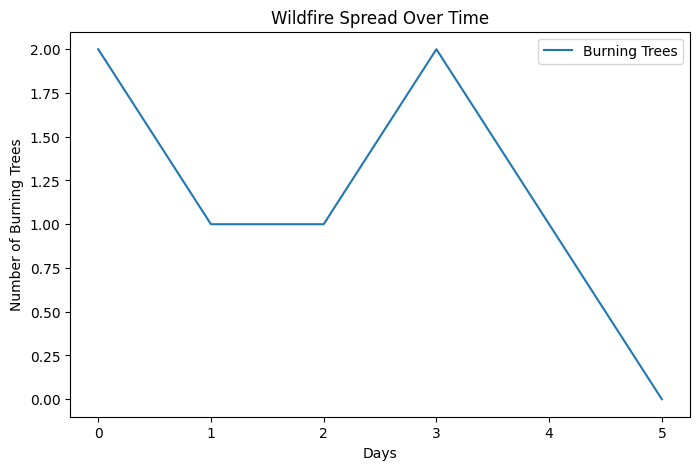

In [4]:
# Run simulation
fire_spread_over_time = simulate_wildfire()

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(
    range(len(fire_spread_over_time)), fire_spread_over_time, label="Burning Trees"
)
plt.xlabel("Days")
plt.ylabel("Number of Burning Trees")
plt.title("Wildfire Spread Over Time")
plt.legend()
plt.show()

### Task 1.1 - Parallelization with Multiprocessing

In [77]:
import multiprocess as mp

In [78]:
# Constants
NUM_WORKERS = 4

In [79]:
def initialize_forest():
    """Creates a forest grid with all trees and ignites one random tree."""
    forest = np.ones((GRID_SIZE, GRID_SIZE), dtype=int)  # All trees
    burn_time = np.zeros(
        (GRID_SIZE, GRID_SIZE), dtype=int
    )  # Tracks how long a tree burns

    # Ignite a random tree
    x, y = random.randint(0, GRID_SIZE - 1), random.randint(0, GRID_SIZE - 1)
    forest[x, y] = BURNING
    burn_time[x, y] = 1  # Fire starts burning

    return forest, burn_time

In [80]:
def get_neighbors(x, y):
    """Returns the neighboring coordinates of a cell in the grid."""
    neighbors = []
    for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:  # Up, Down, Left, Right
        nx, ny = x + dx, y + dy
        if 0 <= nx < GRID_SIZE and 0 <= ny < GRID_SIZE:
            neighbors.append((nx, ny))
    return neighbors

In [81]:
def day_simulation(forest, burn_time, new_forest):
    """Simulates one day of wildfire spread."""
    for x in range(GRID_SIZE):
        for y in range(GRID_SIZE):
            if forest[x, y] == BURNING:
                burn_time[x, y] += 1  # Increase burn time

                # If burn time exceeds threshold, turn to ash
                if burn_time[x, y] >= BURN_TIME:
                    new_forest[x, y] = ASH

                # Spread fire to neighbors
                for nx, ny in get_neighbors(x, y):
                    if forest[nx, ny] == TREE and random.random() < FIRE_SPREAD_PROB:
                        new_forest[nx, ny] = BURNING
                        burn_time[nx, ny] = 1


In [82]:
def simulate_wildfire(id):
    """Simulates wildfire spread over time."""
    forest, burn_time = initialize_forest()

    fire_spread = []  # Track number of burning trees each day

    for day in range(DAYS):
        new_forest = forest.copy()
        
        day_simulation(forest, burn_time, new_forest)

        forest = new_forest.copy()
        fire_spread.append(np.sum(forest == BURNING))

        if np.sum(forest == BURNING) == 0:  # Stop if no more fire
            break

        # # Plot grid every 5 days
        # if day % 5 == 0 or day == DAYS - 1:
        #     plt.figure(figsize=(6, 6))
        #     plt.imshow(forest, cmap="viridis", origin="upper")
        #     plt.title(f"Wildfire Spread - Day {day}")
        #     plt.colorbar(label="State: 0=Empty, 1=Tree, 2=Burning, 3=Ash")
        #     plt.show()

    return fire_spread


In [ ]:
# Run simulation
with mp.Pool(NUM_WORKERS) as pool:
    fire_spread_over_time = pool.map(simulate_wildfire, range(NUM_WORKERS))
    
fire_spread_over_time_np = np.zeros((NUM_WORKERS, DAYS), dtype=int)

for i, spread in enumerate(fire_spread_over_time):
    fire_spread_over_time_np[i, : len(spread)] = (
        spread
    )
    
result = np.mean(fire_spread_over_time_np, axis=0)

60


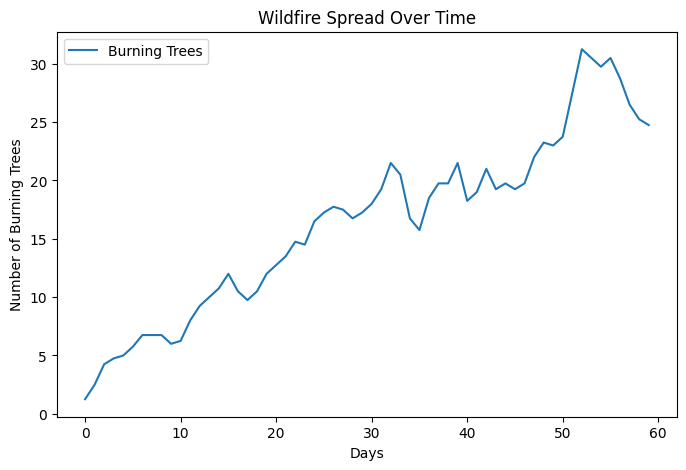

In [84]:
# Plot results
plt.figure(figsize=(8, 5))
plt.plot(
    range(len(result)), result, label="Burning Trees"
)
plt.xlabel("Days")
plt.ylabel("Number of Burning Trees")
plt.title("Wildfire Spread Over Time")
plt.legend()
plt.show()

### Task 1.2 - Parallelization with Dask

In [85]:
import dask
import dask.array as da
from dask.distributed import Client
client = Client()

/Users/albinww/Programming/Github/hpc/venv/lib/python3.13/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 50035 instead
  warnings.warn(


In [86]:
def initialize_forest():
    """Creates a forest grid with all trees and ignites one random tree."""
    forest = np.ones((GRID_SIZE, GRID_SIZE), dtype=int)  # All trees
    burn_time = np.zeros(
        (GRID_SIZE, GRID_SIZE), dtype=int
    )  # Tracks how long a tree burns

    # Ignite a random tree
    x, y = random.randint(0, GRID_SIZE - 1), random.randint(0, GRID_SIZE - 1)
    forest[x, y] = BURNING
    burn_time[x, y] = 1  # Fire starts burning

    return forest, burn_time

In [87]:
def get_neighbors(x, y):
    """Returns the neighboring coordinates of a cell in the grid."""
    neighbors = []
    for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:  # Up, Down, Left, Right
        nx, ny = x + dx, y + dy
        if 0 <= nx < GRID_SIZE and 0 <= ny < GRID_SIZE:
            neighbors.append((nx, ny))
    return neighbors

In [88]:
def day_simulation(forest, burn_time, new_forest):
    """Simulates one day of wildfire spread."""
    for x in range(GRID_SIZE):
        for y in range(GRID_SIZE):
            if forest[x, y] == BURNING:
                burn_time[x, y] += 1  # Increase burn time

                # If burn time exceeds threshold, turn to ash
                if burn_time[x, y] >= BURN_TIME:
                    new_forest[x, y] = ASH

                # Spread fire to neighbors
                for nx, ny in get_neighbors(x, y):
                    if forest[nx, ny] == TREE and random.random() < FIRE_SPREAD_PROB:
                        new_forest[nx, ny] = BURNING
                        burn_time[nx, ny] = 1

In [89]:
@dask.delayed
def simulate_wildfire():
    """Simulates wildfire spread over time."""
    forest, burn_time = initialize_forest()

    fire_spread = []  # Track number of burning trees each day

    for day in range(DAYS):
        new_forest = forest.copy()

        day_simulation(forest, burn_time, new_forest)

        forest = new_forest.copy()
        fire_spread.append(np.sum(forest == BURNING))

        if np.sum(forest == BURNING) == 0:  # Stop if no more fire
            break

        # # Plot grid every 5 days
        # if day % 5 == 0 or day == DAYS - 1:
        #     plt.figure(figsize=(6, 6))
        #     plt.imshow(forest, cmap='viridis', origin='upper')
        #     plt.title(f"Wildfire Spread - Day {day}")
        #     plt.colorbar(label="State: 0=Empty, 1=Tree, 2=Burning, 3=Ash")
        #     plt.show()

    return fire_spread

In [90]:
NUM_WORKERS = 4

In [91]:
# Run simulation
fire_spread_over_time = [simulate_wildfire() for _ in range(NUM_WORKERS)]

computed_fire_spread = dask.compute(*fire_spread_over_time)
print(len(computed_fire_spread[0]))

fire_spread_over_time_np = da.zeros((NUM_WORKERS, DAYS), dtype=int)

for i, spread in enumerate(computed_fire_spread):
    fire_spread_over_time_np[i, : len(spread)] = spread

result = da.mean(fire_spread_over_time_np, axis=0).compute()

60


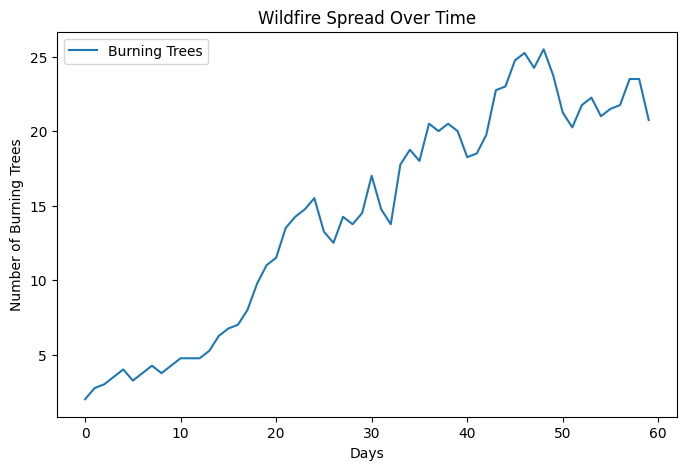

In [92]:
# Plot results
plt.figure(figsize=(8, 5))
plt.plot(range(len(result)), result, label="Burning Trees")
plt.xlabel("Days")
plt.ylabel("Number of Burning Trees")
plt.title("Wildfire Spread Over Time")
plt.legend()
plt.show()